<script type="text/javascript" src="http://cdn.mathjax.org/mathjax/latest/MathJax.js?config=default"></script>

# Maximum Likelihood Estimation

> According to wikipedia, maximum likelihood estimation ([MLE](https://en.wikipedia.org/wiki/Maximum_likelihood_estimation)) can be seen as a special case of maximum a posterior estimaion(MAP) that assumes a **uniform prior distribution** of the parameters, or as a variant of the MAP that ignores the prior and which therefore is unregularized.

## MLE
Suppose there are $n$ samples $x_1$, $x_2$, ..., $x_n$ which are *independent and identically distributed* (i.i.d) drawn from the probability density function $f(\mathbf{x}|\theta)$ with parameters $\theta$.

The joint density function is 

$f(x_1, x_2, ..., x_n\mid\theta)=f(x_1\mid\theta)\times f(x_2\mid\theta)\times ...\times f(x_n\mid\theta)$, 

what we want to know is $\theta$. So considering functions of $\theta$, the same function will be called **likelihood**, 

$\mathcal{L}(\theta;x_1,x_2,...,x_n)=f(x_1, x_2, ..., x_n\mid\theta)=\prod_{i=1}^{n}f(x_i\mid\theta)$

For computing reasons, it's often to use the **log-likehood** form, 

$\ln\mathcal{L}(\theta;x_1,x_2,...,x_n)=\sum_{i=1}^{n}\ln f(x_i\mid\theta)$

The **maximum likelihood estimation** method is to find $\hat\theta$ that maximum the likelihood function $\ln\mathcal{L}(\theta;\bf{x})$.

## MLE for Normal Distribution

For $n$ samples $\bf{x_n}$ of normal distribution $\bf{x_n}\sim \mathcal{N}(\mu,\sigma)$, 
the paramters $\theta=(\mu, \sigma^2)$, the probability density function is 

$$f_{\bf{x}}(x_i)=\frac{1}{\sqrt{2\pi\sigma}}\exp\left({-\frac{(x_i-\mu)^2}{2\sigma ^2}}\right)$$

Thus the likelihood function is 

$$\mathcal{L}(\mu,\sigma^2;x_1,x_2,...,x_n)=(2\pi\sigma ^2)^{-n/2}\exp\left( -\frac{1}{2\sigma ^2}\sum_{i=1}^{n}(x_i-\mu)^2 \right) $$

The log-likelihood function is 

$$\mathcal{l}(\mu,\sigma^2;x_1,x_2,...,x_n)=-\frac{n}{2}\ln(2\pi)-\frac{n}{2}\ln(\sigma^2) -\frac{1}{2\sigma ^2}\sum_{i=1}^{n}(x_i-\mu)^2  $$

To get the maximum likihood, we set the derivative of $\mathcal{l}(\mu,\sigma^2;\bf{x})$ respect to $\mu$ and $\sigma^2$ to 0, to obtain that

$$\hat\mu = \frac{1}{n}\sum_{i=1}^{n}(x_i)$$

$$\hat\sigma^2 = \frac{1}{n} \sum_{i=1}^{n}(x_i-\hat\mu)^2$$


## Example
Assuming we want to know the height distribution of boys of an area. We cannot measure all of the boys, we first sample some boys randomly and compute the distribution to estimate the overall distribution.

We generate 10000 samples randomly from the normar distribution with mean=180, standard deviation=10.

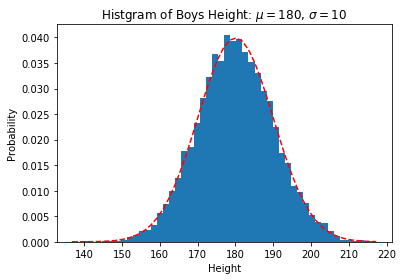

In [70]:
import numpy as np
np.seed = 0
mu, sigma = 180, 10
num_boys = 10000
boys = np.random.normal(mu, sigma, num_boys)

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
num_bins = 50
count, bins, patches = plt.hist(boys, num_bins, normed=True)

y = mlab.normpdf(bins, mu, sigma)
plt.plot(bins, y, 'r--')
plt.xlabel('Height')
plt.ylabel('Probability')
plt.title(r'Histgram of Boys Height: $\mu=180$, $\sigma=10$')
plt.show()

Thus we get the estimate of mean $\mu$ and standard deviation $\sigma$ by maximum likelihood function.

In [72]:
import math
mu_mle = sum(boys) / len(boys)
sigma_mle = math.sqrt(sum(map(lambda x : (x - mu_mle)**2, boys)) / len(boys))
print('Estimated mu=%s, sigma=%s' % (mu_mle, sigma_mle))

Estimated mu=180.042879514, sigma=10.040574940906497


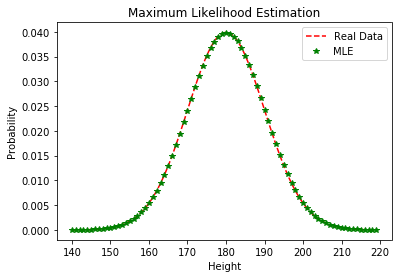

In [73]:
x = np.array(range(140, 220, 1))

y_real = mlab.normpdf(x, mu, sigma)
y_mle = mlab.normpdf(x, mu_mle, sigma_mle)
plt.plot(x, y_real, 'r--', label='Real Data')
plt.plot(x, y_mle, 'g*', label='MLE')
plt.xlabel('Height')
plt.ylabel('Probability')
plt.title(r'Maximum Likelihood Estimation')
plt.legend()
plt.show()

# Maximum A Posteriori Estimation

## Prior Distribution
Consider computing the probability of head and tail of toss a coin, we can do a lot of times and count the number of both sides, thus obtain the probability. But if we get head all the times unfortunately when we toss a certain small times, we will conclude that $p(head)=1$, which is obviously wrong. In this situation, a prior of head and tail have a identical probability is necessary and important.

## MAP
**Maximum A Posterior** Estimation (MAP) is related to maximum likelihood estimation with a prior distribution. MAP can be seen as a *regularization* of MLE.

Given a probability distribution $f$ with the underlying population paramter $\theta$, the maximum likelihood estimation is 

$$\hat\theta_{ML} = \arg\max_{\theta}f(\mathbf{x}\mid\theta)$$

Assume the prior distribution of $\theta$ $g(\theta)$ exsits. From the Bayes' theorem the posterior distribution of $\theta$ will be


$$\theta \to f(\theta\mid \mathbf{x}) = \frac{ f(\mathbf{x} \mid\theta) g(\theta) } {\int_{\varphi} f(\mathbf{x}\mid\mathcal{\varphi})g(\mathcal{\varphi})d\mathcal{\varphi} }$$

The MAP of $\theta$ is 

$$\hat\theta_{MAP} = \arg\max_{\theta}\frac{f(\mathbf{x}\mid\theta)g(\theta)}{\int_{\varphi} f(\mathbf{x}\mid\mathcal{\varphi})g(\mathcal{\varphi})d\mathcal{\varphi} } = \arg\max_{\theta}f(\mathbf{x}\mid\theta)g(\theta) = \arg\max_{\theta} \prod_{i=1}^{n}f(x_i\mid\theta) \times g(\theta) $$

For the denominator has no relation with $\theta$. 

If $g(\theta)$ is an uniform (constant function), the MAP will be idential with MLE.

Thus the log of the MAP function is 

$$ \hat\theta_{MAP} = \arg\max_{\theta}\left(\sum_{i=1}^{n}\ln f(x_i\mid\theta) + \ln g(\theta)\right) $$

which is actually MLE plus the log of the prior distribution.



## MAP Computation
### 1. Anlytically
Used if the posterior distribution is in closed form, and a conjugate prior is used.

#### Conjugate Prior
For computation and mathematical reasons, the prior distribution of a known distribution is always chosen, to obtain a posterior distribution in the same familiy with prior distribution. The prior and posterior are called **conjugate distributions**, and the prior is called a **[conjugate prior](https://en.wikipedia.org/wiki/Conjugate_prior)** of the likelihood function.

Some conjage prior examples.


| Parameter | Distribution |
| :--------- | ----------: |
| Bernouli $p$ | Beta | 
| Binomial $p$ | Beta | 
| Poission $\lambda$ | Gamma | 
| Exponential $\lambda$ | Gamma | 
| Multinomial $p_i$ | Dirichlet | 
| Normal $\mu$ | Noraml | 
| Normal $\sigma^2$ | Inverse Normal | 

#### MAP for Normal Distribution

Assume a normal distribution $X \sim \mathcal{N}(\mu, \sigma)$, and a prior distribution of $\mu$ is given by $\mu \sim \mathcal{N}(\mu_p, \sigma_p^2)$, we wish to find the MAP estimate of $\mu$. For the normal distribution, the conjugate prior is also a normal distribution.

The posterior distribution of $\mu$ is 

$$ p(\mu|\mathbf{x}) = \frac{p(\mathbf{x}\mid\mu)p(\mu)}{\int_{\mu_\varphi}p(\mathbf{x}\mid\mu_\varphi)p(\mu_\varphi)d\mu_\varphi} \propto p(\mathbf{x}\mid\mu)p(\mu) = \prod_{i=1}^{n}\frac{1}{\sqrt{2\pi\sigma}}\exp\left({-\frac{(x_i-\mu)^2}{2\sigma ^2}}\right) \times \frac{1}{\sqrt{2\pi\sigma_p}}\exp\left({-\frac{(\mu-\mu_p)^2}{2\sigma_p ^2}}\right) $$ 



Thus the MAP estimation of $\mu$ is 

$$ \hat\mu_{MAP} = \arg\max_{\mu} p(\mu\mid\mathbf{x}) = \arg\max_{\mu}\ln p(\mu\mid\mathbf{x}) = \arg\max_{\mu}\left( -\sum_{i=1}^{n}\frac{(x_i-\mu)^2}{2\sigma^2}-\frac{(\mu-\mu_p)^2}{2\sigma_p^2}\right) $$

$$\hat\mu_{MAP} = \frac{\sigma_p^2}{  \sigma^2 + n\sigma_p^2 } \sum_{i=1}^{n}x_i + \frac{\sigma^2\mu_p}{\sigma^2 + n\sigma_p^2} = \frac{n\sigma_p^2}{  \sigma^2 + n\sigma_p^2 } \left(\frac{1}{n}\sum_{i=1}^{n}x_i\right) + \frac{\sigma^2\mu_p}{\sigma^2 + n\sigma_p^2} $$ 

For the data of boys height, we let $\sigma$=10, $\mu_p=170$ and $\sigma_p=10$ for simplicity, then we calculate $\mu$ using MAP.

In [84]:
n = len(boys)
sigma_map, mu_p, sigma_p = 10, 170, 10

denominator = sigma ** 2 + n * (sigma_p ** 2)

mu_map = (n * (sigma_map ** 2)) * \
    (1. / n * sum(boys)) / denominator \
    + sigma_map ** 2 * mu_p / denominator 

print("Real mu is \t%s" % mu)
print("MLE of mu is \t%s" % mu_mle)
print("MAP of mu is \t%s" % mu_map)

Real mu is 	180
MLE of mu is 	180.042879514
MAP of mu is 	180.041875327


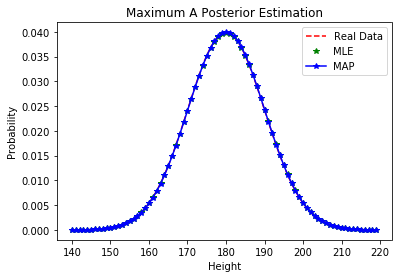

In [82]:
x = np.array(range(140, 220, 1))

y_real = mlab.normpdf(x, mu, sigma)
y_mle = mlab.normpdf(x, mu_mle, sigma_mle)
y_map = mlab.normpdf(x, mu_map, sigma_map)
plt.plot(x, y_real, 'r--', label='Real Data')
plt.plot(x, y_mle, 'g*', label='MLE')
plt.plot(x, y_map, 'b-*', label='MAP')
plt.xlabel('Height')
plt.ylabel('Probability')
plt.title(r'Maximum A Posterior Estimation')
plt.legend()
plt.show()

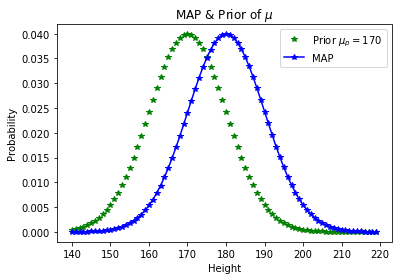

In [89]:
x = np.array(range(140, 220, 1))

y_map_p = mlab.normpdf(x, mu_p, sigma_map)
y_map = mlab.normpdf(x, mu_map, sigma_map)
plt.plot(x, y_map_p, 'g*', label='Prior $\mu_p=170$')
plt.plot(x, y_map, 'b-*', label='MAP')
plt.xlabel('Height')
plt.ylabel('Probability')
plt.title(r'MAP & Prior of $\mu$')
plt.legend()
plt.show()


### 2. Numerial Optimization
To be continuned in the **Optimization** Chapter.

### 3. Expection Maximization

**[Expection Maximization](https://en.wikipedia.org/wiki/Expectation%E2%80%93maximization_algorithm)** is an iterative method to find MLE or MAP estimates of paramters in statistical models, which depends on unobserved **latent variables**.

+ **E**xpection-Step
> Creates a function for the expectation of the log-likelihood evaluated using the current estimate for the parameters.

+ **M**aximization-Step
> Computes parameters maximizing the expected log-likelihood found on the **E** Step.

### 4. Monte Carlo Method